 # Text Classification-part1
Nabiha Tariq, Naima Khan, Javeria Ishaque, Sameen Amna, Suha Ahmed

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
file_path = "/Users/nabihatariq/Downloads/Tweets.csv"
df = pd.read_csv(file_path)

In [4]:
print(df.head())
print(df.describe())



             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

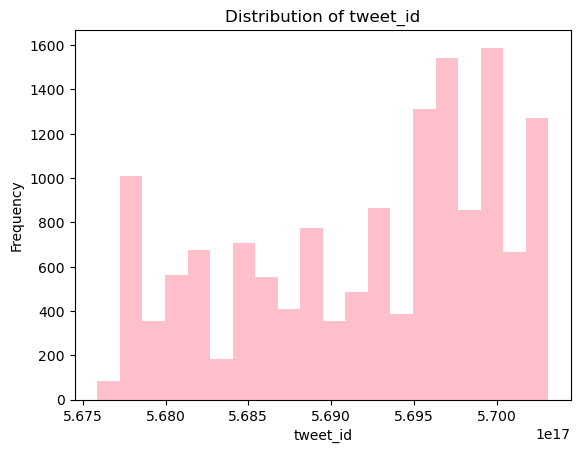

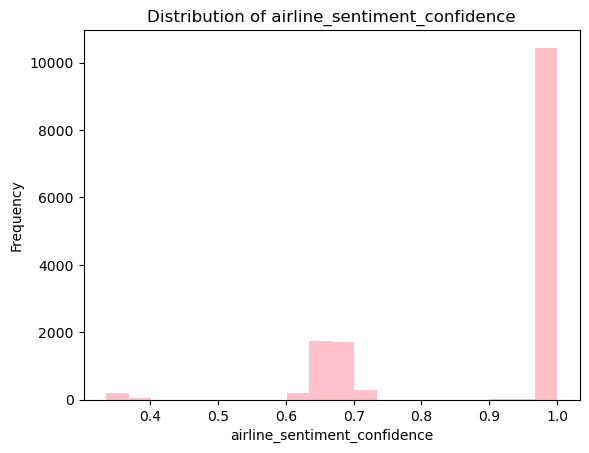

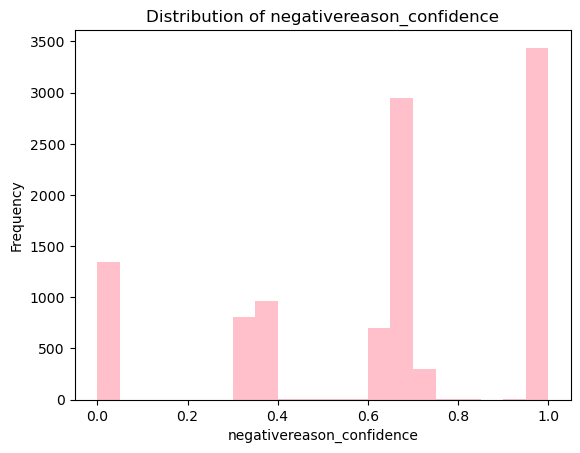

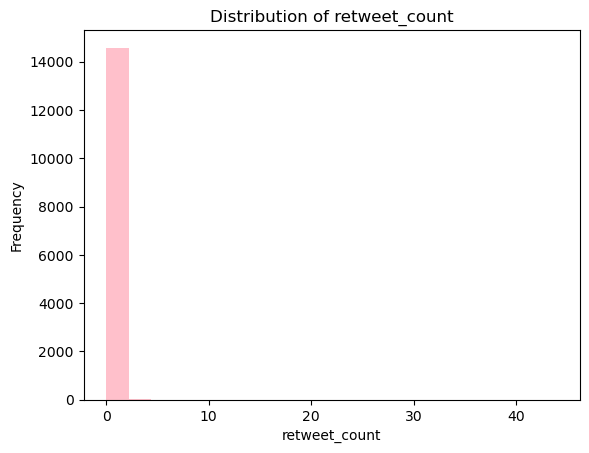

In [5]:
#histogram
for column in df.columns:
    if df[column].dtype != 'O':  # Check if the column is not of object type (non-text)
        df[column].plot(kind='hist', bins=20,color='pink')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {column}')
        plt.show()

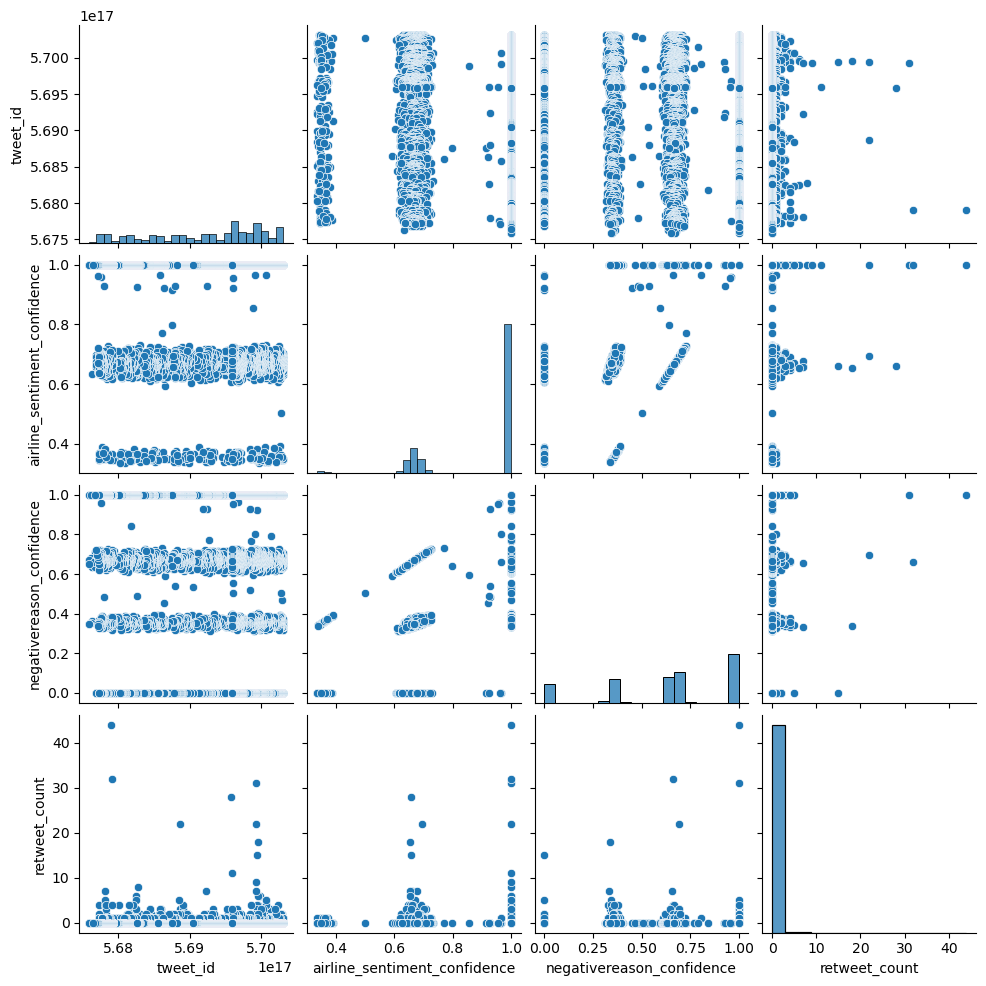

In [6]:
numerical_columns =df.select_dtypes(include=['int64', 'float64'])
sns.pairplot(numerical_columns)
plt.show()

/var/folders/3f/q5rh5t5909zg22v0xpdg_50c0000gn/T/ipykernel_52668/2645243352.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                              tweet_id  airline_sentiment_confidence  \
tweet_id                      1.000000                      0.024840   
airline_sentiment_confidence  0.024840                      1.000000   
negativereason_confidence     0.021533                      0.685879   
retweet_count                -0.008852                      0.012581   

                              negativereason_confidence  retweet_count  
tweet_id                                       0.021533      -0.008852  
airline_sentiment_confidence                   0.685879       0.012581  
negativereason_confidence                      1.000000       0.021574  
retweet_count                                  0.021574       1.000000  


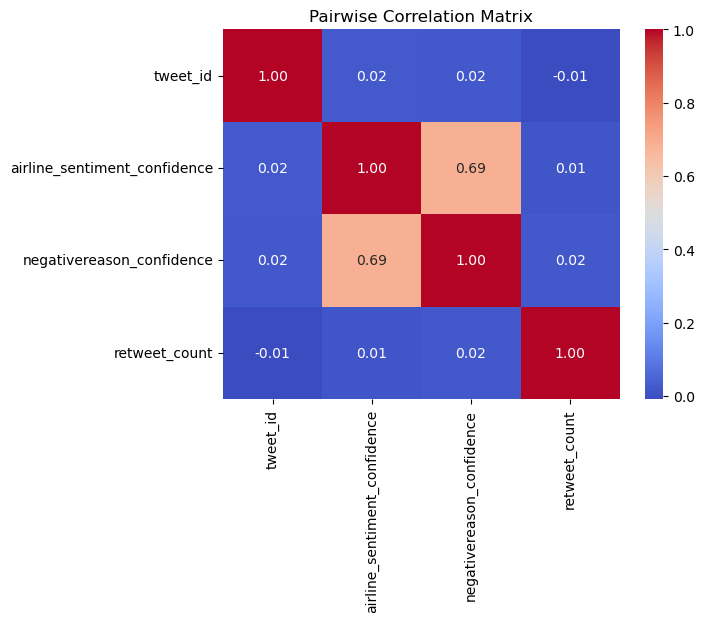

In [7]:
correlation_matrix = df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Matrix')
plt.show()

In [8]:
df.isnull().sum()



tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

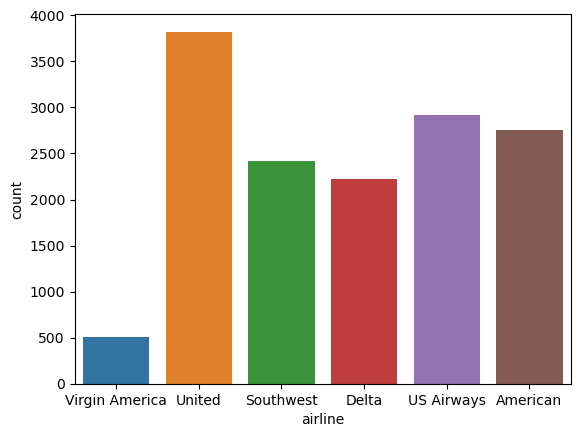

In [9]:
sns.countplot(data=df,x="airline")
plt.show()

In [10]:
df.drop(['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], axis=1,inplace=True)

In [11]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


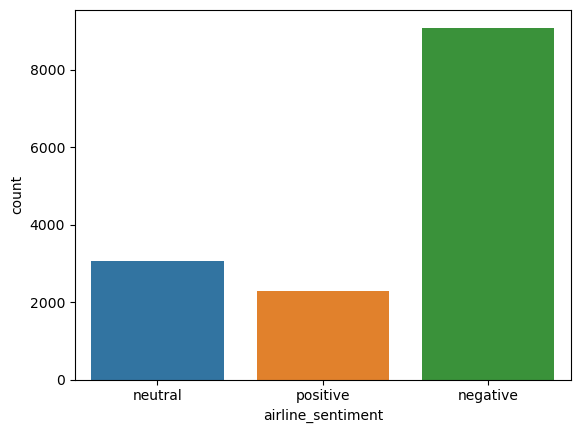

In [12]:
sns.countplot(data=df, x="airline_sentiment")
plt.show()

In [13]:
pd.DataFrame(df.text.apply(len).describe())

,text
count,14452.000000
mean,104.118738
std,35.991567
min,12.000000
25%,77.000000
50%,115.000000
75%,136.000000
max,186.000000


In [14]:
pip install punkt


ERROR: Could not find a version that satisfies the requirement punkt (from versions: none)
ERROR: No matching distribution found for punkt
Note: you may need to restart the kernel to use updated packages.


In [15]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [16]:
import nltk
nltk.download('punkt')

import nltk
nltk.download('stopwords')



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nabihatariq/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nabihatariq/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stemmer = PorterStemmer()

In [19]:
# Modifying the preprocess_text function to include stemming
def preprocess_text(text):
    # Remove special characters, URLs, and user mentions
    text = ' '.join(word for word in word_tokenize(text) if not word.startswith('@') and word.isalnum())
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    text = ' '.join(word for word in words if word not in stop_words)
    # Apply stemming to each word
    words = word_tokenize(text)
    text = ' '.join(stemmer.stem(word) for word in words)
    return text

# Assuming 'df' is your DataFrame with a 'text' column
df['text'] = df['text'].apply(preprocess_text)

In [20]:
df

,airline_sentiment,text
0,neutral,virginamerica dhepburn said
1,positive,virginamerica plu ad commerci experi tacki
2,neutral,virginamerica today must mean need take anoth ...
3,negative,virginamerica realli aggress blast obnoxi ente...
4,negative,virginamerica realli big bad thing
...,...,...
14635,positive,americanair thank got differ flight chicago
14636,negative,americanair leav 20 minut late flight warn com...
14637,neutral,americanair pleas bring american airlin blackb...
14638,negative,americanair money chang flight answer phone su...


In [21]:
mapping = {"negative": 0, 'neutral': 1, "positive": 2}
df["airline_sentiment"] = df["airline_sentiment"].map(mapping)

In [22]:
df.head(3)

,airline_sentiment,text
0,1,virginamerica dhepburn said
1,2,virginamerica plu ad commerci experi tacki
2,1,virginamerica today must mean need take anoth ...


In [23]:
X=df["text"]
y=df["airline_sentiment"]

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [26]:
count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(X)
feature_names = count_vectorizer.get_feature_names_out()

In [27]:
X=pd.DataFrame(X_counts.toarray())

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [43]:
naivebayes = MultinomialNB(alpha=0.9).fit(X_train, y_train)

In [44]:
naivebayes_pred=naivebayes.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
accuracy_score(y_test,naivebayes_pred)

0.764760147601476

In [48]:
print(classification_report(y_test, naivebayes_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      2723
           1       0.65      0.44      0.52       934
           2       0.74      0.54      0.63       679

    accuracy                           0.76      4336
   macro avg       0.73      0.64      0.67      4336
weighted avg       0.75      0.76      0.75      4336



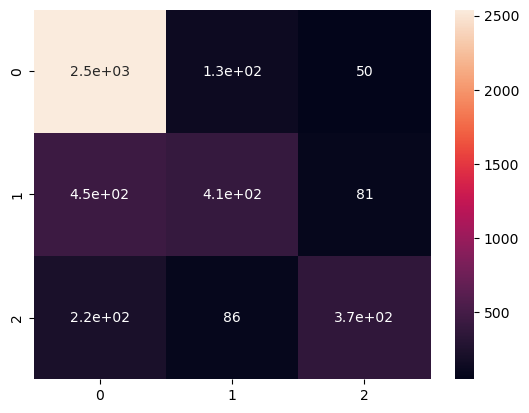

In [49]:
sns.heatmap(confusion_matrix(y_test, naivebayes_pred),  annot=True)
plt.show()